In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [26]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X_all = mnist.data
y_all = mnist.target.astype(int)

# random sampling instead of stratified split
np.random.seed(7)
indices = np.random.choice(len(X_all), 2000, replace=False)

X = X_all[indices]
y = y_all[indices]


In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)


Train Shape: (1600, 784)
Test Shape: (400, 784)


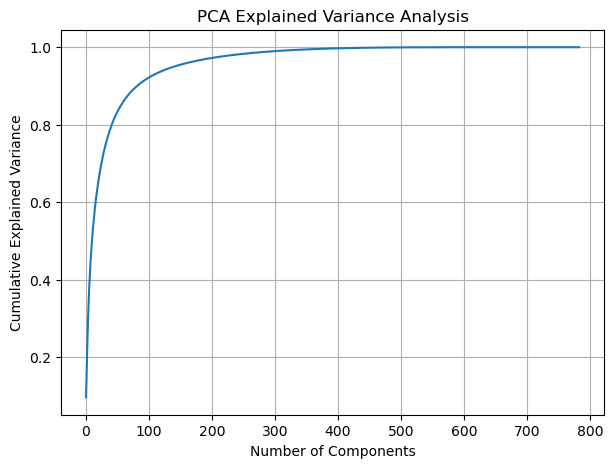

In [28]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_train)

pca_check = PCA()
pca_check.fit(X_scaled)

cum_variance = np.cumsum(
    pca_check.explained_variance_ratio_
)

plt.figure(figsize=(7,5))
plt.plot(cum_variance)
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Analysis")
plt.grid(True)
plt.show()


In [29]:
classifiers = {

    "LogReg":
        LogisticRegression(
            max_iter=2000,
            solver='lbfgs',
            C=0.7
        ),

    "SVM_RBF":
        SVC(
            kernel='rbf',
            C=3,
            gamma='scale'
        ),

    "KNN":
        KNeighborsClassifier(
            n_neighbors=7,
            weights='distance'
        ),

    "DecisionTree":
        DecisionTreeClassifier(
            max_depth=18,
            min_samples_split=6
        )
}


In [30]:
base_accuracy = {}

for name, clf in classifiers.items():

    pipe = make_pipeline(
        MinMaxScaler(),
        clf
    )

    pipe.fit(X_train, y_train)
    pred = pipe.predict(X_test)

    acc = accuracy_score(y_test, pred)
    base_accuracy[name] = acc

    print(f"{name} Accuracy : {acc:.3f}")


LogReg Accuracy : 0.890
SVM_RBF Accuracy : 0.948
KNN Accuracy : 0.912
DecisionTree Accuracy : 0.715


In [31]:
components_list = [15, 30, 60, 120]

pca_scores = {k: [] for k in classifiers}


In [32]:
for comp in components_list:

    print(f"\nRunning PCA with {comp} components")

    for name, clf in classifiers.items():

        model = make_pipeline(
            MinMaxScaler(),
            PCA(n_components=comp),
            clf
        )

        model.fit(X_train, y_train)
        preds = model.predict(X_test)

        score = accuracy_score(y_test, preds)
        pca_scores[name].append(score)

        print(name, ":", score)



Running PCA with 15 components
LogReg : 0.855
SVM_RBF : 0.95
KNN : 0.925
DecisionTree : 0.73

Running PCA with 30 components
LogReg : 0.8975
SVM_RBF : 0.9675
KNN : 0.935
DecisionTree : 0.715

Running PCA with 60 components
LogReg : 0.92
SVM_RBF : 0.9675
KNN : 0.935
DecisionTree : 0.7075

Running PCA with 120 components
LogReg : 0.8925
SVM_RBF : 0.975
KNN : 0.9275
DecisionTree : 0.6675


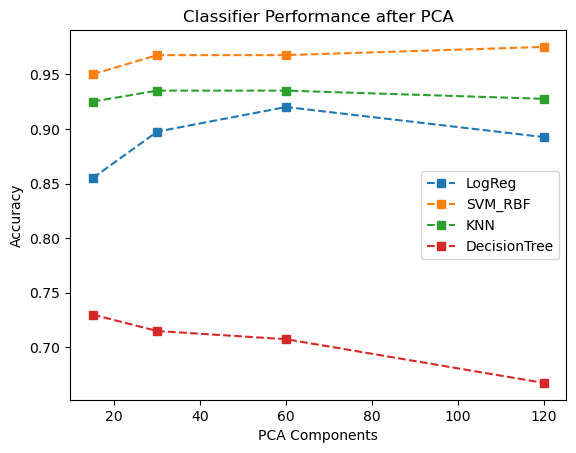

In [33]:
plt.figure()

for key in pca_scores:
    plt.plot(components_list,
             pca_scores[key],
             linestyle='--',
             marker='s',
             label=key)

plt.title("Classifier Performance after PCA")
plt.xlabel("PCA Components")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


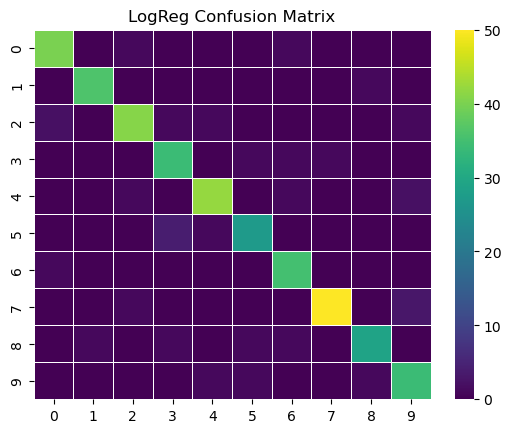

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.97      0.97        37
           2       0.93      0.89      0.91        46
           3       0.85      0.92      0.88        37
           4       0.93      0.91      0.92        46
           5       0.90      0.84      0.87        32
           6       0.90      0.97      0.93        36
           7       0.98      0.93      0.95        54
           8       0.94      0.88      0.91        33
           9       0.85      0.92      0.88        37

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



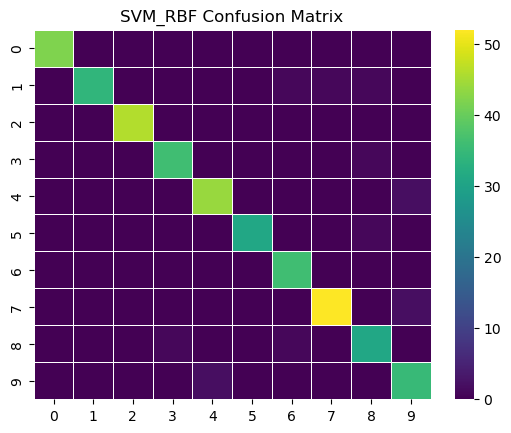

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      0.92      0.96        37
           2       1.00      1.00      1.00        46
           3       0.97      0.97      0.97        37
           4       0.96      0.96      0.96        46
           5       1.00      0.97      0.98        32
           6       0.95      1.00      0.97        36
           7       0.98      0.96      0.97        54
           8       0.91      0.94      0.93        33
           9       0.90      0.95      0.92        37

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



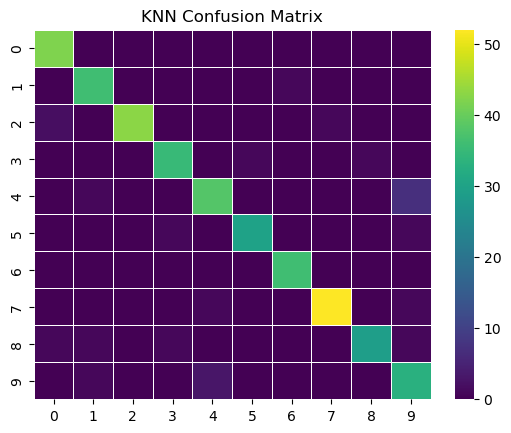

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        42
           1       0.92      0.97      0.95        37
           2       1.00      0.93      0.97        46
           3       0.95      0.95      0.95        37
           4       0.90      0.83      0.86        46
           5       0.97      0.94      0.95        32
           6       0.97      1.00      0.99        36
           7       0.98      0.96      0.97        54
           8       0.97      0.88      0.92        33
           9       0.77      0.89      0.82        37

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.93       400
weighted avg       0.94      0.94      0.94       400



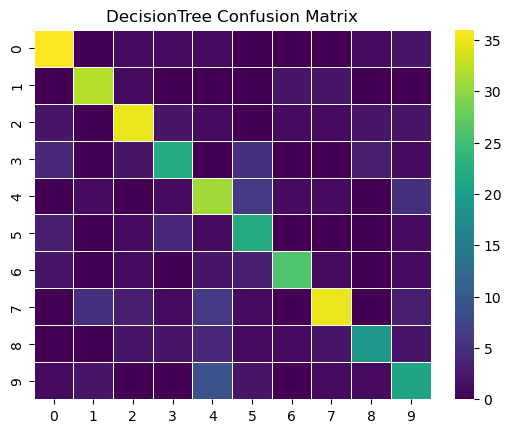

              precision    recall  f1-score   support

           0       0.75      0.86      0.80        42
           1       0.80      0.86      0.83        37
           2       0.76      0.76      0.76        46
           3       0.67      0.59      0.63        37
           4       0.56      0.67      0.61        46
           5       0.55      0.69      0.61        32
           6       0.84      0.72      0.78        36
           7       0.81      0.65      0.72        54
           8       0.73      0.58      0.64        33
           9       0.55      0.57      0.56        37

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.69       400
weighted avg       0.71      0.70      0.70       400



In [34]:
best_comp = 60

for name, clf in classifiers.items():

    final_model = make_pipeline(
        MinMaxScaler(),
        PCA(n_components=best_comp),
        clf
    )

    final_model.fit(X_train, y_train)
    predictions = final_model.predict(X_test)

    cm = confusion_matrix(y_test, predictions)

    sns.heatmap(cm,
                cmap="viridis",
                linewidths=0.5)

    plt.title(f"{name} Confusion Matrix")
    plt.show()

    print(classification_report(y_test, predictions))


In [35]:
print("Average PCA Accuracy:",
      np.mean(pca_scores[name]))


Average PCA Accuracy: 0.705
